In [15]:
import numpy as np
import pandas as pd
from particle_creation import *
from mass_asign import *
from grav_potential import *
from acceleration import *
from astropy import units as u
from astropy import constants as const
from astropy.cosmology import Planck18 as cosmo
from tqdm import tqdm

In [26]:
# https://web.archive.org/web/20130217114132/http://t8web.lanl.gov/people/heitmann/test3.html
filename = '/Users/abry/data/Santa_Barbara/ic_sb128/particles_ic_sb128'
data = np.fromfile(filename, dtype=np.float32)
data = data.reshape(-1, 8)
par_df = pd.DataFrame(columns=['pos_x','vel_x','pos_y','vel_y','pos_z','vel_z','mass','id'], data=data)
box_size = 64
# x[Mpc], v_x[km/s], y[Mpc], v_y[km/s], z[Mpc], v_z[km/s], particle mass[M_sol], particle tag
par_df.loc[:, ['vel_x','vel_y', 'vel_z']] = par_df.loc[:, ['vel_x','vel_y', 'vel_z']]*(u.km/u.s).to(u.Mpc/u.Gyr)

Initial density field

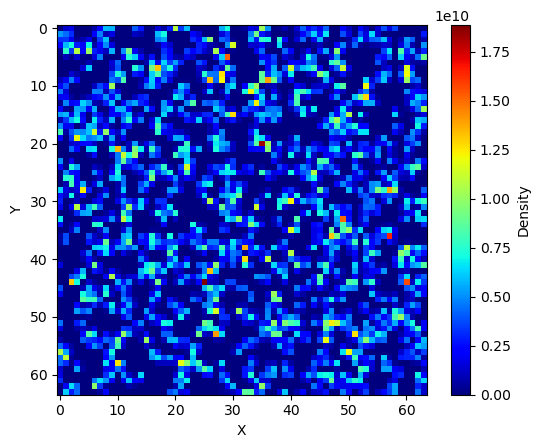

In [27]:
par_list = par_create_3d(par_df.sample(1000))
import matplotlib.pyplot as plt

# Generate density field using CIC scheme
rho = cic_density_3d(pars=par_list, ng=ng, h=1)
# Project density field along z-axis
rho_proj = np.sum(rho, axis=2)

# Visualize projected density field using Matplotlib
fig, ax = plt.subplots()
im = ax.imshow(rho_proj, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(im)
cbar.set_label('Density')
plt.show()

In [28]:
dt = 0.1
ng = 64
for step in tqdm(range(int(cosmo.lookback_time(20).value/0.1))):
     
    for par in par_list:
        # Fitrst step:
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.periodic(ng)
        
    dens = cic_density_3d(pars=par_list, ng=ng, h=1) ## Update density field
    phi = grav_phi_3d(dens,h=1)    ## Update gravity field
    cic_acc_3d(pars=par_list, phi=phi, h=1)  ## Update acceleration
    # Second step:
    for par in par_list:
        par.vel += par.acc * dt
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.periodic(ng)
    # Plot
    
    # for par in par_list:
    #     # color = cmap(par.id % 10) 
    #     im = ax.scatter(par.pos[0], par.pos[1], s=3)
    #     ax.set_xlim(0, ng)
    #     ax.set_ylim(0, ng)
# Set the colorbar
# norm = plt.Normalize(0, 9)  # Normalize the colormap to the range [0, 9]
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Particle ID')

100%|██████████| 136/136 [01:00<00:00,  2.23it/s]


Density field @ z=0

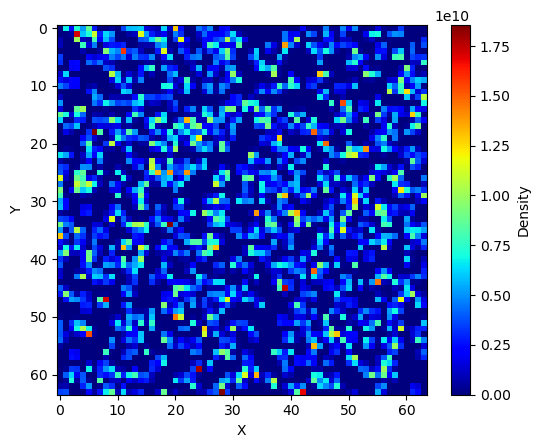

In [29]:
import matplotlib.pyplot as plt

# Generate density field using CIC scheme
rho = cic_density_3d(pars=par_list, ng=ng, h=1)
# Project density field along z-axis
rho_proj = np.sum(rho, axis=2)

# Visualize projected density field using Matplotlib
fig, ax = plt.subplots()
im = ax.imshow(rho_proj, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(im)
cbar.set_label('Density')
plt.show()